1. Import Libaray

In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


2. Cleaning

In [3]:
# Load cleaned CSV
df = pd.read_csv('/Users/rajsavsingh/Documents/AIML/Rishita_AIML_Dataset.csv')
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36,19,01A,1141387,1913179,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
1,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50,13,01A,1152781,1941458,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
2,13279676,JG507211,09-11-2023 07:30,019XX W BYRON ST,620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47,5,5,1162518,1925906,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
3,13274752,JG501049,12-11-2023 07:59,086XX S COTTAGE GROVE AVE,454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6,44,08B,1183071,1847869,2023,09-12-2023 15:41,41.737751,-87.604856,"(41.737750767, -87.604855911)"
4,13203321,JG415333,06-09-2023 17:00,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,42,32,14,1174694,1901831,2023,04-11-2023 15:40,41.886018,-87.633938,"(41.886018055, -87.633937881)"


In [4]:
print(df.columns)
df.isnull().sum()

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [7]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Create 'Hour' and 'Month'
df['Hour'] = df['Date'].dt.hour
df['Month'] = df['Date'].dt.month

# Drop rows with missing values in important columns
df_clean = df.dropna(subset=['Latitude', 'Longitude', 'Primary Type', 'Arrest', 'Hour', 'Month'])

# Encode 'Primary Type'
le = LabelEncoder()
df_clean['Primary Type'] = le.fit_transform(df_clean['Primary Type'])

/var/folders/sw/r7__svtx0fz_j3xvz7bwr29h0000gn/T/ipykernel_51499/3577392800.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


3. EDA

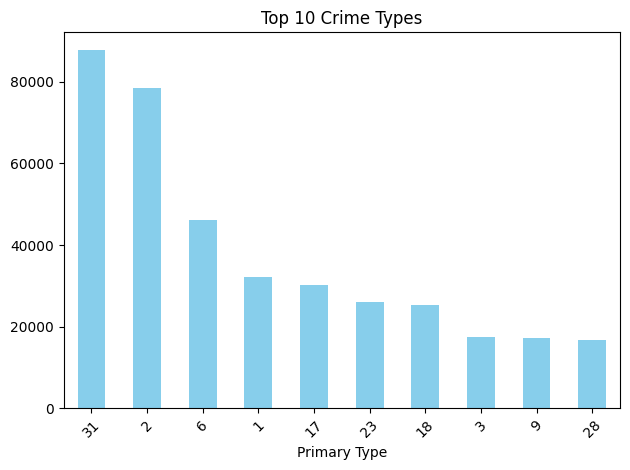

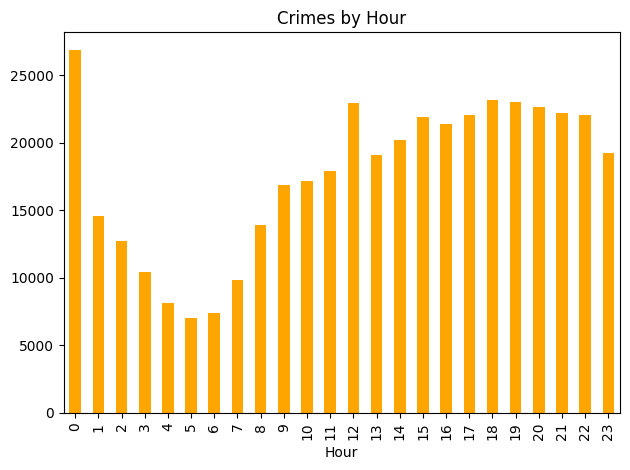

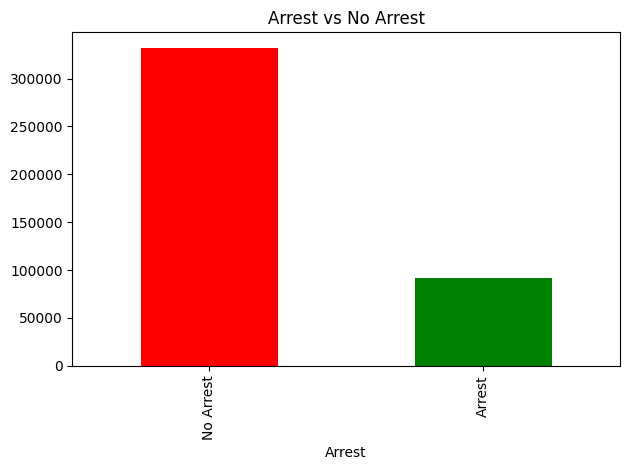

In [8]:
# Top 10 crime types
df_clean['Primary Type'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Crime Types")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Crimes by Hour
df_clean['Hour'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title("Crimes by Hour")
plt.tight_layout()
plt.show()

# Arrest Distribution
df_clean['Arrest'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title("Arrest vs No Arrest")
plt.xticks(ticks=[0, 1], labels=["No Arrest", "Arrest"])
plt.tight_layout()
plt.show()

4. Supervised Learning - Random Forest

In [ ]:
# spilt the data
X = df_clean[['Primary Type', 'Latitude', 'Longitude', 'Hour', 'Month']]
y = df_clean['Arrest']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [11]:
#train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

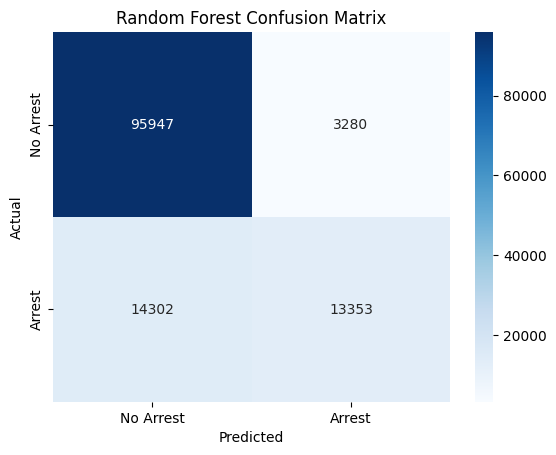

Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.97      0.92     99227
        True       0.80      0.48      0.60     27655

    accuracy                           0.86    126882
   macro avg       0.84      0.72      0.76    126882
weighted avg       0.86      0.86      0.85    126882

Accuracy: 86.14 %


In [12]:
# Evaluate the model
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Arrest', 'Arrest'], yticklabels=['No Arrest', 'Arrest'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Report and Accuracy
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")

In [13]:
# Train Accuracy
train_acc = rf_model.score(X_train, y_train)
print("Train Accuracy:", round(train_acc * 100, 2), "%")

# Test Accuracy (you already did)
test_acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", round(test_acc * 100, 2), "%")

Train Accuracy: 99.76 %
Test Accuracy: 86.14 %


In [45]:
train_acc_rf = rf_model.score(X_train, y_train)
test_acc_rf = accuracy_score(y_test, y_pred)

print("Train Accuracy (RF):", round(train_acc_rf * 100, 2), "%")
print("Test Accuracy (RF):", round(test_acc_rf * 100, 2), "%")

# Fit check
diff_rf = abs(train_acc_rf - test_acc_rf)

if train_acc_rf > 0.95 and diff_rf > 0.05:
    print("🟥 RF Model is OVERFITTING (Train accuracy is too high vs Test).")
elif train_acc_rf < 0.75 and test_acc_rf < 0.75:
    print("🟨 RF Model is UNDERFITTING (Both accuracies are low).")
elif diff_rf <= 0.05:
    print("🟩 RF Model is a GOOD FIT (Train and test accuracy are close).")
else:
    print("⚠️ RF Model may need tuning. Fit is unclear.")

Train Accuracy (RF): 99.76 %
Test Accuracy (RF): 86.14 %
🟥 RF Model is OVERFITTING (Train accuracy is too high vs Test).


TUNE the Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Tuned parameters
rf_tuned = RandomForestClassifier(
    n_estimators=100,        # Number of trees
    max_depth=10,            # Limit depth (start with 10, try 8–12)
    min_samples_split=10,    # Prevent too-small splits
    random_state=42
)

rf_tuned.fit(X_train, y_train)
y_pred_tuned = rf_tuned.predict(X_test)

Train Accuracy: 85.93 %
Test Accuracy: 85.52 %
              precision    recall  f1-score   support

       False       0.85      0.99      0.91     99227
        True       0.92      0.37      0.52     27655

    accuracy                           0.86    126882
   macro avg       0.89      0.68      0.72    126882
weighted avg       0.87      0.86      0.83    126882



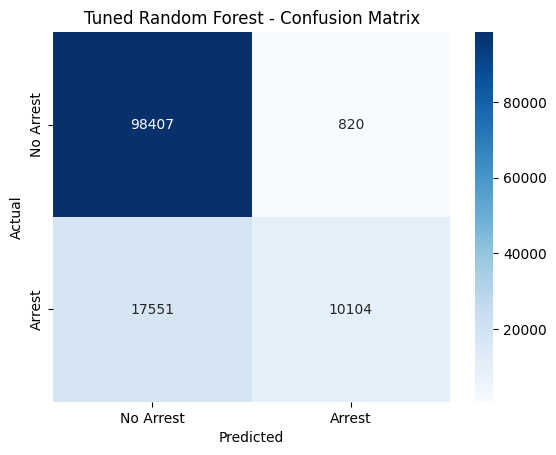

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
train_acc = rf_tuned.score(X_train, y_train)
test_acc = accuracy_score(y_test, y_pred_tuned)

print("Train Accuracy:", round(train_acc * 100, 2), "%")
print("Test Accuracy:", round(test_acc * 100, 2), "%")

# Classification Report
print(classification_report(y_test, y_pred_tuned))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Arrest', 'Arrest'], yticklabels=['No Arrest', 'Arrest'])
plt.title("Tuned Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [34]:
# Print accuracy results
print("Train Accuracy:", round(train_acc * 100, 2), "%")
print("Test Accuracy:", round(test_acc * 100, 2), "%")

# Decide Fit Type
diff = abs(train_acc - test_acc)

if train_acc > 0.95 and diff > 0.1:
    print("🟥 Model is OVERFITTING (High train, much lower test accuracy).")
elif train_acc < 0.75 and test_acc < 0.75:
    print("🟨 Model is UNDERFITTING (Low accuracy on both train and test).")
elif diff <= 0.05:
    print("🟩 Model is a GOOD FIT (Train and test accuracy are close).")
else:
    print("⚠️ Model is not clearly overfit or underfit. Consider tuning.")

Train Accuracy: 85.93 %
Test Accuracy: 85.52 %
🟩 Model is a GOOD FIT (Train and test accuracy are close).


In [17]:
# Example input: Theft at 2AM in a certain location
new_data = pd.DataFrame({
    'Primary Type': [le.transform(['THEFT'])[0]],  # use LabelEncoder
    'Latitude': [41.88],
    'Longitude': [-87.62],
    'Hour': [2],
    'Month': [6]
})

In [18]:
prediction = rf_tuned.predict(new_data)

if prediction[0]:
    print("🚨 Arrest is likely.")
else:
    print("🕵️‍♂️ No arrest is expected.")

🕵️‍♂️ No arrest is expected.


Supervised Learning - Decision Tree Classifier

In [21]:
# Train the CART model

cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)
y_pred_cart = cart_model.predict(X_test)

CART - Train Accuracy: 99.76 %
CART - Test Accuracy: 79.67 %
Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.86      0.87     99227
        True       0.53      0.55      0.54     27655

    accuracy                           0.80    126882
   macro avg       0.70      0.71      0.71    126882
weighted avg       0.80      0.80      0.80    126882



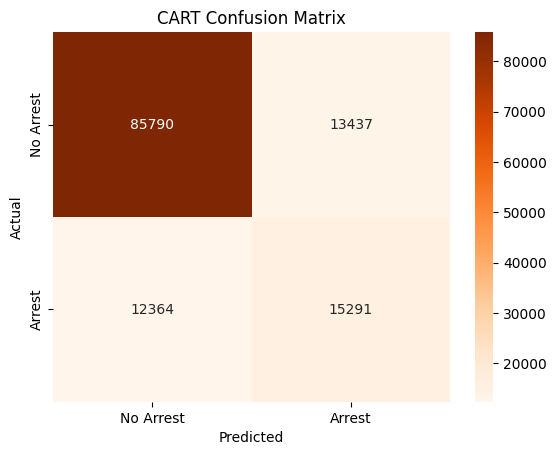

In [22]:
#Evaluate the CART model
# Accuracy
train_acc_cart = cart_model.score(X_train, y_train)
test_acc_cart = accuracy_score(y_test, y_pred_cart)

print("CART - Train Accuracy:", round(train_acc_cart * 100, 2), "%")
print("CART - Test Accuracy:", round(test_acc_cart * 100, 2), "%")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_cart))

# Confusion Matrix
cm_cart = confusion_matrix(y_test, y_pred_cart)
sns.heatmap(cm_cart, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Arrest', 'Arrest'], yticklabels=['No Arrest', 'Arrest'])
plt.title("CART Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [48]:
# Fit analysis for original CART (before tuning)
def check_fit_before_tuning(train_acc, test_acc):
    print("\n[Before Tuning] CART Model Fit Analysis:")
    print(f"Train Accuracy: {round(train_acc * 100, 2)}%")
    print(f"Test Accuracy: {round(test_acc * 100, 2)}%")

    gap = train_acc - test_acc
    if train_acc > 0.90 and gap > 0.15:
        print("→ The model is likely **Overfitting** (high train, low test).")
    elif train_acc < 0.70 and test_acc < 0.70:
        print("→ The model is likely **Underfitting** (both train and test are low).")
    elif abs(gap) <= 0.10:
        print("→ The model has a **Good Fit** (train and test are close).")
    else:
        print("→ The model might be unbalanced or needs more analysis.")

# Call the function
check_fit_before_tuning(train_acc_cart, test_acc_cart)



[Before Tuning] CART Model Fit Analysis:
Train Accuracy: 99.76%
Test Accuracy: 79.67%
→ The model is likely **Overfitting** (high train, low test).


Tune the CART Model

In [24]:
# Tuning hyperparameters
cart_tuned = DecisionTreeClassifier(
    max_depth=10,            # limit tree depth
    min_samples_split=10,    # avoid small splits
    criterion='gini',        # or try 'entropy'
    random_state=42
)

cart_tuned.fit(X_train, y_train)
y_pred_cart_tuned = cart_tuned.predict(X_test)

Tuned CART - Train Accuracy: 86.75 %
Tuned CART - Test Accuracy: 86.16 %
Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.98      0.92     99227
        True       0.88      0.42      0.57     27655

    accuracy                           0.86    126882
   macro avg       0.87      0.70      0.74    126882
weighted avg       0.86      0.86      0.84    126882



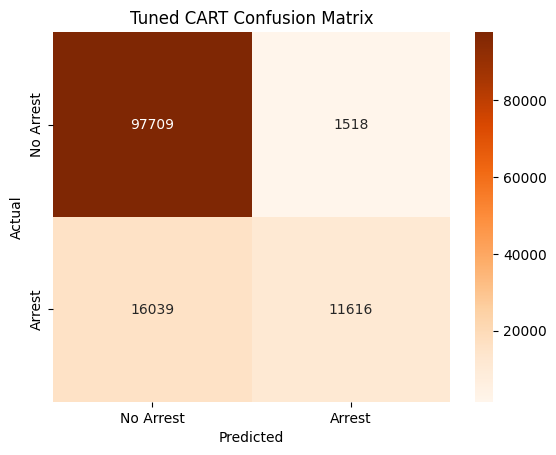

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
train_acc_cart_tuned = cart_tuned.score(X_train, y_train)
test_acc_cart_tuned = accuracy_score(y_test, y_pred_cart_tuned)

print("Tuned CART - Train Accuracy:", round(train_acc_cart_tuned * 100, 2), "%")
print("Tuned CART - Test Accuracy:", round(test_acc_cart_tuned * 100, 2), "%")

# Report
print("Classification Report:\n", classification_report(y_test, y_pred_cart_tuned))

# Confusion Matrix
cm_cart_tuned = confusion_matrix(y_test, y_pred_cart_tuned)
sns.heatmap(cm_cart_tuned, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Arrest', 'Arrest'], yticklabels=['No Arrest', 'Arrest'])
plt.title("Tuned CART Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [49]:
# Fit analysis for tuned CART (after tuning)
def check_fit_after_tuning(train_acc, test_acc):
    print("\n[After Tuning] Tuned CART Model Fit Analysis:")
    print(f"Train Accuracy: {round(train_acc * 100, 2)}%")
    print(f"Test Accuracy: {round(test_acc * 100, 2)}%")

    gap = train_acc - test_acc
    if train_acc > 0.90 and gap > 0.15:
        print("→ Still **Overfitting** – try more regularization.")
    elif train_acc < 0.70 and test_acc < 0.70:
        print("→ Still **Underfitting** – try increasing model complexity.")
    elif abs(gap) <= 0.10:
        print("→ **Good Fit Achieved** after tuning.")
    else:
        print("→ Mixed results – further analysis or tuning may help.")

# Call the function
check_fit_after_tuning(train_acc_cart_tuned, test_acc_cart_tuned)



[After Tuning] Tuned CART Model Fit Analysis:
Train Accuracy: 86.75%
Test Accuracy: 86.16%
→ **Good Fit Achieved** after tuning.


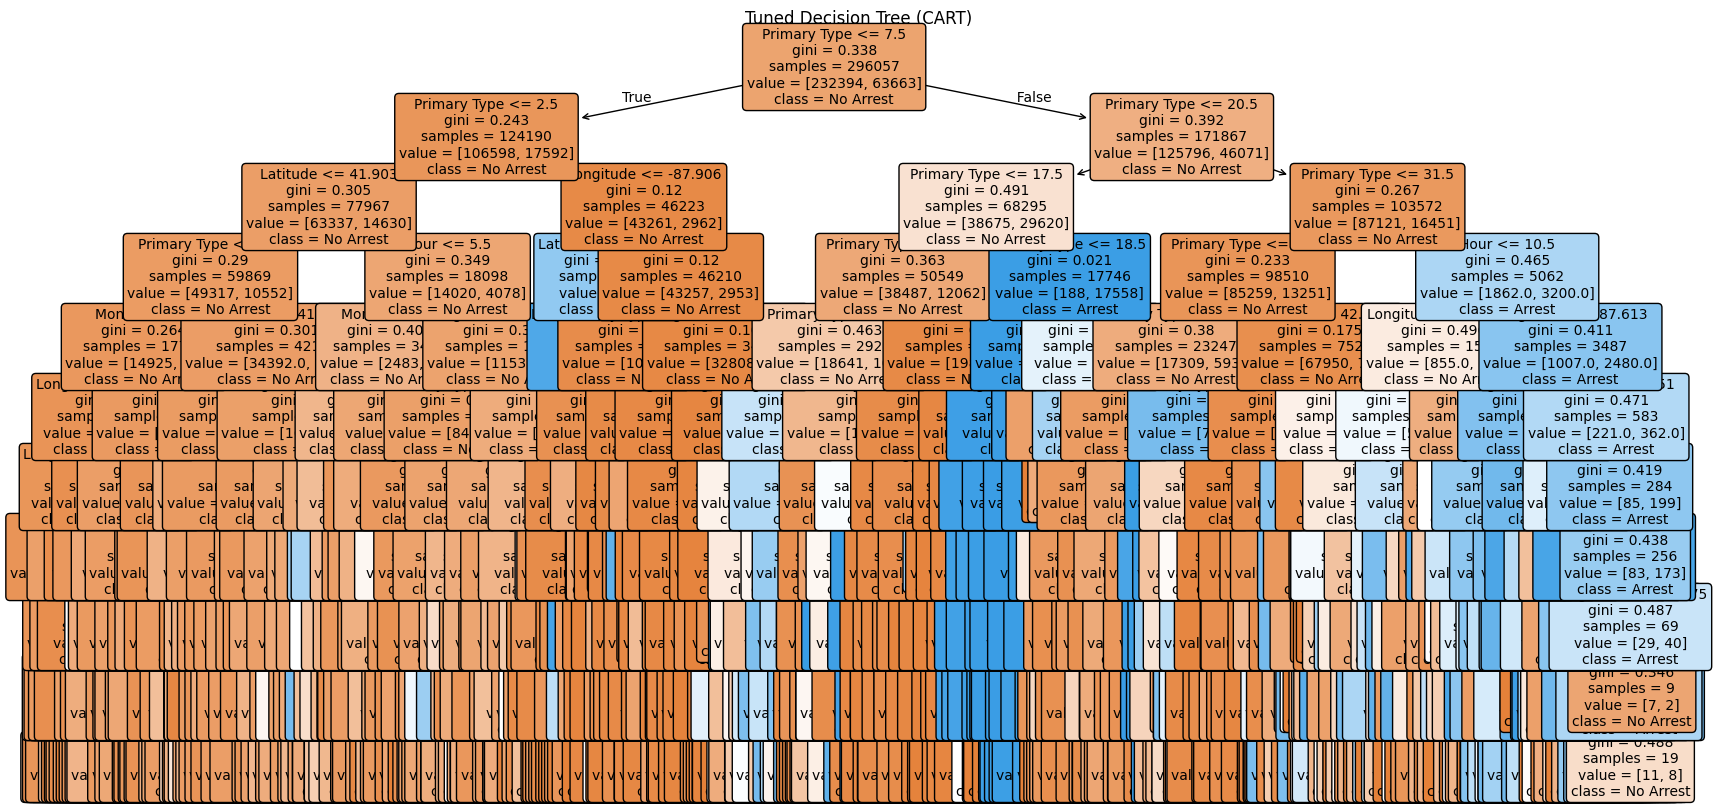

In [46]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(cart_tuned, 
          feature_names=X.columns, 
          class_names=['No Arrest', 'Arrest'], 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Tuned Decision Tree (CART)")
plt.show()


UNSUPERVISED LEARNING: Crime Hotspot Detection using K-Means

In [28]:
# Extract only the required columns
location_data = df_clean[['Latitude', 'Longitude']].dropna()

Elbow Method to choose best K

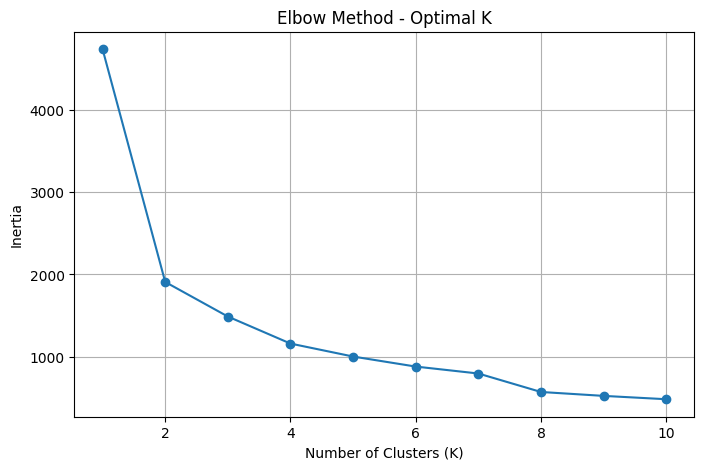

In [ ]:
inertia_values = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(location_data)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

Apply K-Means

In [30]:
# K = 2 (from Elbow)
kmeans2 = KMeans(n_clusters=2, random_state=42)
location_data['Cluster_K2'] = kmeans2.fit_predict(location_data)

# K = 5 (Random)
kmeans5 = KMeans(n_clusters=5, random_state=42)
location_data['Cluster_K5'] = kmeans5.fit_predict(location_data)

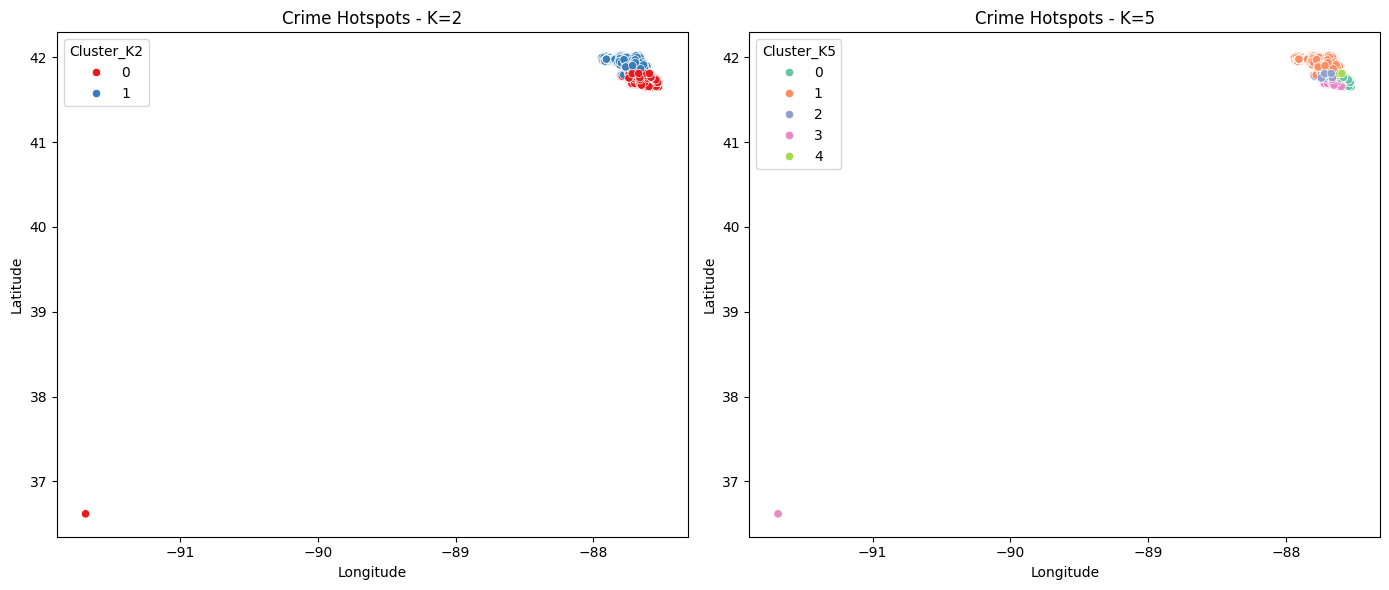

In [31]:
import seaborn as sns

plt.figure(figsize=(14, 6))

# K=2
plt.subplot(1, 2, 1)
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster_K2', data=location_data, palette='Set1')
plt.title("Crime Hotspots - K=2")

# K=5
plt.subplot(1, 2, 2)
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster_K5', data=location_data, palette='Set2')
plt.title("Crime Hotspots - K=5")

plt.tight_layout()
plt.show()

Silhouette Score for deeper evaluation